(higher-order-odes-section)=
# Higher-order Ordinary Differential Equations

The numerical methods that we have looked at are applied to calculate the solutions to ODEs can only be applied to first-order ODEs. To apply them to higher-order ODEs we first need to rewrite them as a system of first-order ODEs. Consider the $n$th-order ODE

$$ y^{(n)} = f(t, y, y', y'' ,\ldots ,y^{(n-1)}). $$

If we let $y_1=y$, $y_2 =y'$, $y_3 =y''$ and so on up to $y_n =y^{(n-1)}$ then we have

\begin{align*}
    y_1' &= y_2,\\
    y_2' &= y_3,\\
    &\vdots \\
    y_n' &= f(t, y_1 , y_2 , y_3 , \ldots, y_n).
\end{align*}

Now we have a system of $n$ first-order ODEs so we can apply our numerical methods for solving ODEs to each equation in the system to give an equivalent solution to the $n$th order ODE.

````{admonition} Example 1.4
:class: seealso
:name: higher-order-odes-example

Rewrite the following ODE as a system of first-order ODEs

\begin{align*}
    y''' + yy'' -2y' + ty'' - 10 = 0.
\end{align*}

```{dropdown} Solution

First rearrange the ODE so that the highest derivative is the subject

\begin{align*}
    y''' = -yy'' + 2y' - ty'' + 10,
\end{align*}

then let $y_1 = y$, $y_2 = y'$, $y_3 = y''$ then we can rewrite this ODE as

\begin{align*}
    y_1' &= y_2, \\
    y_2' &= y_3, \\
    y_3' &= - y_1 y_3 + 2y_2 - t y_3 + 10. 
\end{align*}
```
````

(solving-systems-of-odes-section)=
## Solving systems of ordinary differential equations

Consider a system of $n$ first-order ODEs written in the form

\begin{align*}
    y_1' &= f_1(t, y_1), \\
    y_2' &= f_2(t, y_2), \\
    & \vdots \\
    y_n' &= f_n(t, y_n).
\end{align*}

Let $\mathbf{y}$ and $\mathbf{f}(t_n, \mathbf{y})$ be vectors such that

\begin{align*}
    \mathbf{y} &= \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, &
    \mathbf{f}(t, \mathbf{y}) &= 
    \begin{pmatrix} f_1(t, y_1) \\ f_2(t, y_2) \\ \vdots \\ f_n(t, y_n) \end{pmatrix},
\end{align*}

then we can write the system in vector form

\begin{align*}
    \mathbf{y}' = \mathbf{f}(t, \mathbf{y}).
\end{align*}

The Euler method for solving a system of first-order ODEs is

\begin{align*}
    \mathbf{y}_{n+1} &= \mathbf{y}_n + h \mathbf{f}(t_n, \mathbf{y}_n).
\end{align*}

Initial value problems that are defined using systems of ODEs we need to know the initial solution for each of the individual ODEs, i.e., $y_1(a), y_2(a), \ldots$, in order to be able to obtain a unique solution. 

`````{admonition} Example 1.5
:class: seealso
:name: higher-order-ode-ivp-example

Calculate solution to the following initial value problem using the Euler method with $h=0.2$

\begin{align*}
    y'' + y = 0, \qquad t \in [0,10], \qquad y(0) = 2, \qquad y'(0) = 0
\end{align*}

and compare the computed solution to the exact solution which is $y = 2\cos(t)$.

````{dropdown} Solution

First we need to rewrite the second-order ODE as two first-order ODEs. Let $y_1 = y$ and $y_2 = y'$ then

\begin{align*}
    y_1' &= y_2, & y_1(0) &= 2,\\
    y_2' &= -y_1, & y_2(0) &= 0,
\end{align*}

so

\begin{align*}
    \mathbf{y} &= \begin{pmatrix} y_1 \\ y_2 \end{pmatrix}, &
    \mathbf{f}(t, \mathbf{y}) &= \begin{pmatrix} y_2 \\ -y_1 \end{pmatrix}.
\end{align*}

Calculating the first few steps of the [Euler method](euler-method-definition)

\begin{align*}
    \mathbf{y}_1 &= \mathbf{y}_0 + h \mathbf{f}(t_0, \mathbf{y}_0) 
    = \begin{pmatrix} 2 \\ 0 \end{pmatrix} + 0.2 \begin{pmatrix} 0 \\ -2 \end{pmatrix}
    = \begin{pmatrix} 2 \\ -0.4 \end{pmatrix}, \\
    \mathbf{y}_2 &= \mathbf{y}_1 + h \mathbf{f}(t_1, \mathbf{y}_1) 
    = \begin{pmatrix} 2 \\ -0.4 \end{pmatrix} + 0.2\begin{pmatrix} -0.4 \\ -2 \end{pmatrix}
    = \begin{pmatrix} 1.92 \\ -0.8 \end{pmatrix},\\
    \mathbf{y}_3 &= \mathbf{y}_2 + h \mathbf{f}(t_2, \mathbf{y}_2)
    = \begin{pmatrix} 1.92 \\ -0.8 \end{pmatrix} + 0.2 \begin{pmatrix} 1.92 \\ -0.8 \end{pmatrix}
    = \begin{pmatrix} 1.76 \\ -1.184 \end{pmatrix}, \\
    &\vdots
\end{align*}
   
The exact solution to this IVP is $y(t) = 2 \cos(t)$. The Euler method solution has been calculated over the whole domain and a selection of the domain is tabulated below. Note that the solution $y(t)$ is contained in the $y_1$ column and the $y_2$ column is the first derivative $y'(t)$.

| $t_n$ |  $y_1$  |  $y_2$  |  Exact  |  Error   |
|:-----:|:-------:|:-------:|:-------:|:--------:|
|  0.00 |  2.000000 |  0.000000 |  2.000000 | 0.00e+00 |
|  0.20 |  2.000000 | -0.400000 |  1.960133 | 3.99e-02 |
|  0.40 |  1.920000 | -0.800000 |  1.842122 | 7.79e-02 |
|  0.60 |  1.760000 | -1.184000 |  1.650671 | 1.09e-01 |
|  0.80 |  1.523200 | -1.536000 |  1.393413 | 1.30e-01 |
|  1.00 |  1.216000 | -1.840640 |  1.080605 | 1.35e-01 |
| $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ |
| 10.00 | -4.812425 |  2.295061 | -1.678143 | 3.13e+00 |

The solution using the Euler and RK2 methods is plotted below. The Euler method solution is very inaccurate since it is a first-order method. 

```{glue:figure} higher_order_ode_fig
```
````
`````

| $t_n$ |  $y_1$  |  $y_2$  |  Exact  |  Error   |
|:-----:|:-------:|:-------:|:-------:|:--------:|
|  0.00 |  2.000000 |  0.000000 |  2.000000 | 0.00e+00 |
|  0.20 |  2.000000 | -0.400000 |  1.960133 | 3.99e-02 |
|  0.40 |  1.920000 | -0.800000 |  1.842122 | 7.79e-02 |
|  0.60 |  1.760000 | -1.184000 |  1.650671 | 1.09e-01 |
|  0.80 |  1.523200 | -1.536000 |  1.393413 | 1.30e-01 |
|  1.00 |  1.216000 | -1.840640 |  1.080605 | 1.35e-01 |
| $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ |
| 10.00 | -4.812425 |  2.295061 | -1.678143 | 3.13e+00 |


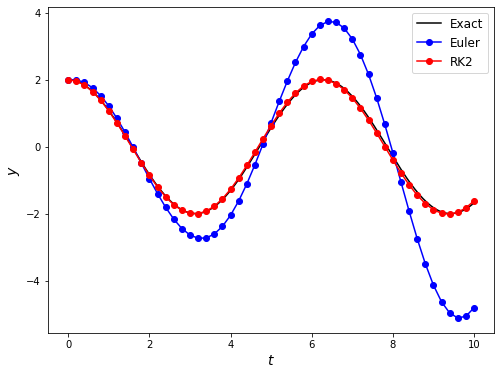

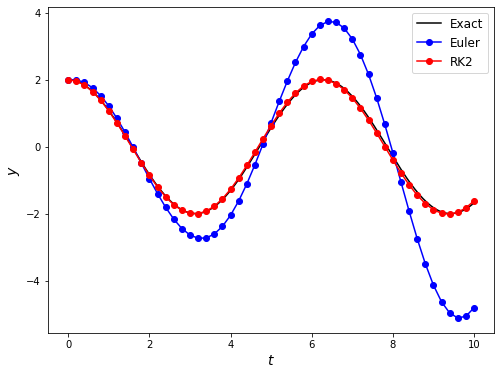

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

def euler(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 


def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        
    return t, y


def f(t, y):
    return np.array([y[1], -y[0]])


def exact(t):
    return 2 * np.cos(t)


# Define IVP
tspan = [0, 10]  # boundaries of the t domain
y0 = [2, 0]      # solution at the lower boundary
h = 0.2          # step length

# Calculate the solution to the IVP
t, y = euler(f, tspan, y0, h)
t_rk2, y_rk2 = rk2(f, tspan, y0, h)

# Calculate exact solution
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)

# Table
print("| $t_n$ |  $y_1$  |  $y_2$  |  Exact  |  Error   |")
print("|:-----:|:-------:|:-------:|:-------:|:--------:|")   
for n in range(6):
    print(f"| {t[n]:5.2f} | {y[n,0]:9.6f} | {y[n,1]:9.6f} | {exact(t[n]):9.6f} | {abs(exact(t[n]) - y[n,0]):7.2e} |")
print(r"| $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ |")
print(f"| {t[-1]:5.2f} | {y[-1,0]:9.6f} | {y[-1,1]:9.6f} | {exact(t[-1]):9.6f} | {abs(exact(t[-1]) - y[-1,0]):7.2e} |")
              
# Plot solution
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y[:,0], "bo-", label="Euler")
plt.plot(t, y_rk2[:,0], "ro-", label="RK2")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

glue("higher_order_ode_fig", fig, display=False)